# EARLY STAGE DIABETES PREDICTION USING DECISION TREE CLASSIFICATION

In [1]:
import numpy as np 
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
my_data = pd.read_csv(r"C:\Users\sanch\Downloads\DAWM project\DAWM project\diabetes_data_upload.csv", delimiter=",")
my_data[0:5]

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Negative
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Negative
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Negative
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Negative
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Negative


In [4]:
#Size of the dataset
my_data.shape

(1030, 17)

In [5]:
#X represents independent/feature variables
X = my_data[['Age','Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing','partial paresis','muscle stiffness','Alopecia','Obesity']].values
X[0:5]

array([[40, 'Male', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes'],
       [58, 'Male', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No',
        'No', 'No', 'Yes', 'No', 'Yes', 'No'],
       [41, 'Male', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes',
        'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
       [45, 'Male', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'No', 'Yes', 'No', 'No', 'No', 'No'],
       [60, 'Male', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes']], dtype=object)

## DATA PREPROCESSING:

### CHECKING IF ANY MISSING VALUES ARE PRESENT -

In [6]:
my_data.isna()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1026,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1027,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1028,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### No missing values are present in the dataset.


### Sklearn Decision Trees do not handle categorical variables. We can handle categorical variables by converting these variables to numerical values.
### Categorical variables, for example, polyuria which contain values as "Yes" and "No" have been transformed to numerical values 1 and 0.

In [7]:
from sklearn import preprocessing

le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male','Female'])
X[:,1] = le_gender.transform(X[:,1])

le_polyuria = preprocessing.LabelEncoder()
le_polyuria.fit([ 'Yes', 'No'])
X[:,2] = le_polyuria.transform(X[:,2])

le_polydipsia = preprocessing.LabelEncoder()
le_polydipsia.fit([ 'Yes', 'No'])
X[:,3] = le_polydipsia.transform(X[:,3])

le_swloss = preprocessing.LabelEncoder()
le_swloss.fit([ 'Yes', 'No'])
X[:,4] = le_swloss.transform(X[:,4])

le_weakness = preprocessing.LabelEncoder()
le_weakness.fit([ 'Yes', 'No'])
X[:,5] = le_weakness.transform(X[:,5])

le_polyphagia = preprocessing.LabelEncoder()
le_polyphagia.fit([ 'Yes', 'No'])
X[:,6] = le_polyphagia.transform(X[:,6])

le_gthrush = preprocessing.LabelEncoder()
le_gthrush.fit([ 'Yes', 'No'])
X[:,7] = le_gthrush.transform(X[:,7])

le_vblurring = preprocessing.LabelEncoder()
le_vblurring.fit([ 'Yes', 'No'])
X[:,8] = le_vblurring.transform(X[:,8])

le_itching = preprocessing.LabelEncoder()
le_itching.fit([ 'Yes', 'No'])
X[:,9] = le_itching.transform(X[:,9])

le_irritability = preprocessing.LabelEncoder()
le_irritability.fit([ 'Yes', 'No'])
X[:,10] = le_irritability.transform(X[:,10])

le_dhealing = preprocessing.LabelEncoder()
le_dhealing.fit([ 'Yes', 'No'])
X[:,11] = le_dhealing.transform(X[:,11])

le_paresis = preprocessing.LabelEncoder()
le_paresis.fit([ 'Yes', 'No'])
X[:,12] = le_paresis.transform(X[:,12])

le_mstiffness = preprocessing.LabelEncoder()
le_mstiffness.fit([ 'Yes', 'No'])
X[:,13] = le_mstiffness.transform(X[:,13])

le_alopecia = preprocessing.LabelEncoder()
le_alopecia.fit([ 'Yes', 'No'])
X[:,14] = le_alopecia.transform(X[:,14])

le_obesity = preprocessing.LabelEncoder()
le_obesity.fit([ 'Yes', 'No'])
X[:,15] = le_obesity.transform(X[:,15])

X[0:5]

array([[40, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1],
       [58, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0],
       [41, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0],
       [45, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0],
       [60, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=object)

In [8]:
#Y represents the target variable/dependent variable
y = my_data["class"]
y[0:5]

0    Negative
1    Negative
2    Negative
3    Negative
4    Negative
Name: class, dtype: object

# TRAINING AND TESTING THE DATASET:

### The dataset is split into 70% training dataset and 30% testing dataset.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [11]:
print('Shape of X training set {}'.format(X_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (721, 16) &  Size of Y training set (721,)


In [12]:
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (309, 16) &  Size of Y test set (309,)


# DECISION TREE CLASSIFICATION USING ENTROPY:
### An instance of the DecisionTreeClassifier called decisionTree is created.
### Inside of the classifier, specify criterion="entropy" so that we can see the information gain of each node.

In [13]:
decisionTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
decisionTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [14]:
decisionTree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [15]:
predTree = decisionTree.predict(X_testset)

In [16]:
print (predTree [0:5])
print (y_testset [0:5])

['Negative' 'Positive' 'Negative' 'Positive' 'Positive']
949     Negative
1020    Positive
958     Negative
555     Negative
175     Positive
Name: class, dtype: object


# ACCURACY MEASURE:
### Accuracy of diabetes prediction using decision tree classification: 89.6%

In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

Decision Trees's Accuracy:  0.8964401294498382


# PERFORMANCE EVALUATION:

## CONFUSION MATRIX

<AxesSubplot:>

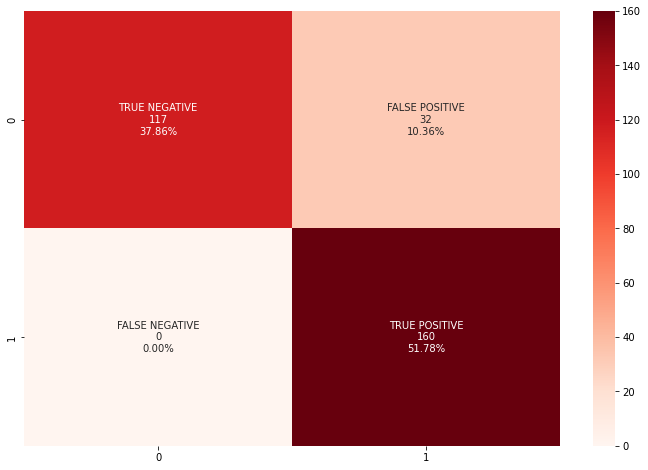

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_testset, predTree)

group_names = ["TRUE NEGATIVE","FALSE POSITIVE","FALSE NEGATIVE","TRUE POSITIVE"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2) 
plt.figure(figsize = (12,8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Reds')

# DECISION TREE VISUALIZATION:

In [20]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

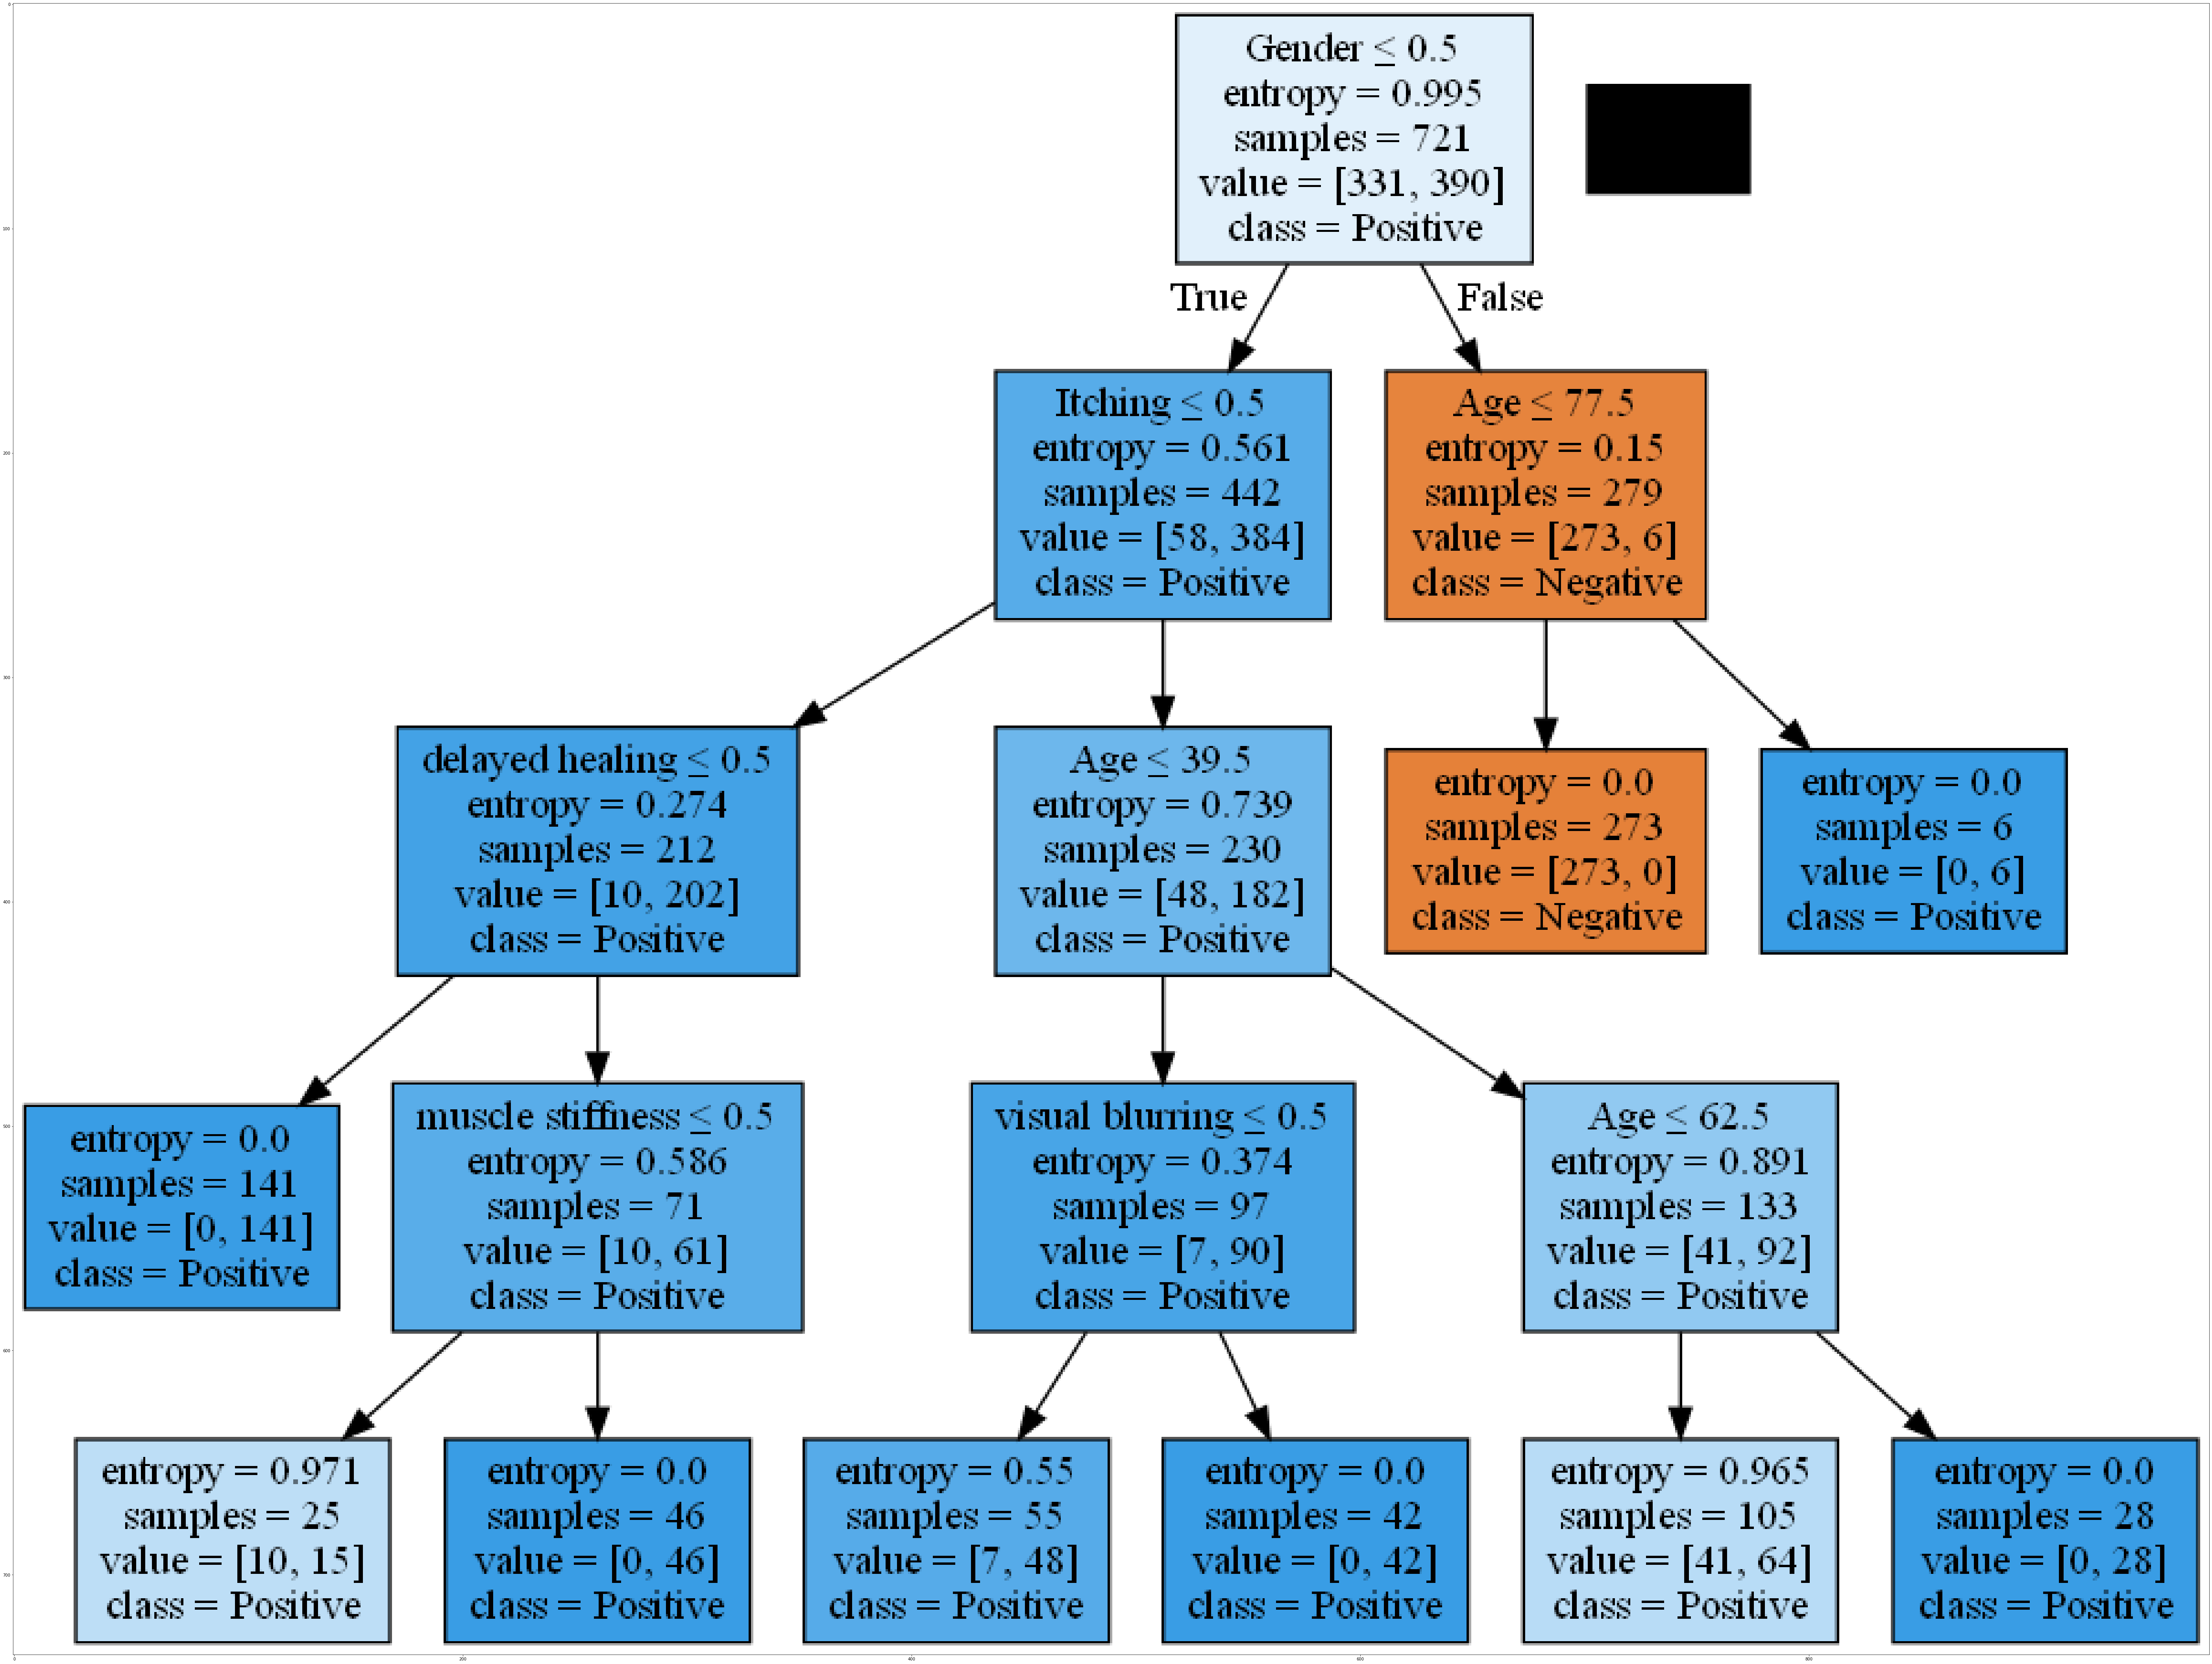

In [21]:
dot_data = StringIO()
filename = "patienttree.png"
featureNames = my_data.columns[0:16]
targetNames = my_data["class"].unique().tolist()
out=tree.export_graphviz(decisionTree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')